error in line 9
invalid data: 
error in line 19
invalid data: 
error in line 29
invalid data: 
error in line 39
invalid data: 
error in line 49
invalid data: 
error in line 59
invalid data: 
error in line 69
invalid data: 
error in line 79
invalid data: 
error in line 89
invalid data: 
error in line 99
invalid data: 
error in line 109
invalid data: 
error in line 119
invalid data: 
error in line 129
invalid data: 
error in line 139
invalid data: 
error in line 149
invalid data: 
error in line 159
invalid data: 
error in line 169
invalid data: 
error in line 179
invalid data: 
error in line 189
invalid data: 
error in line 199
invalid data: 
error in line 209
invalid data: 
error in line 219
invalid data: 
error in line 229
invalid data: 
error in line 240
invalid data: 
error in line 251
invalid data: 
error in line 261
invalid data: 
error in line 271
invalid data: 
error in line 282
invalid data: 
error in line 292
invalid data: 
error in line 302
invalid data: 
error in line 312
inv

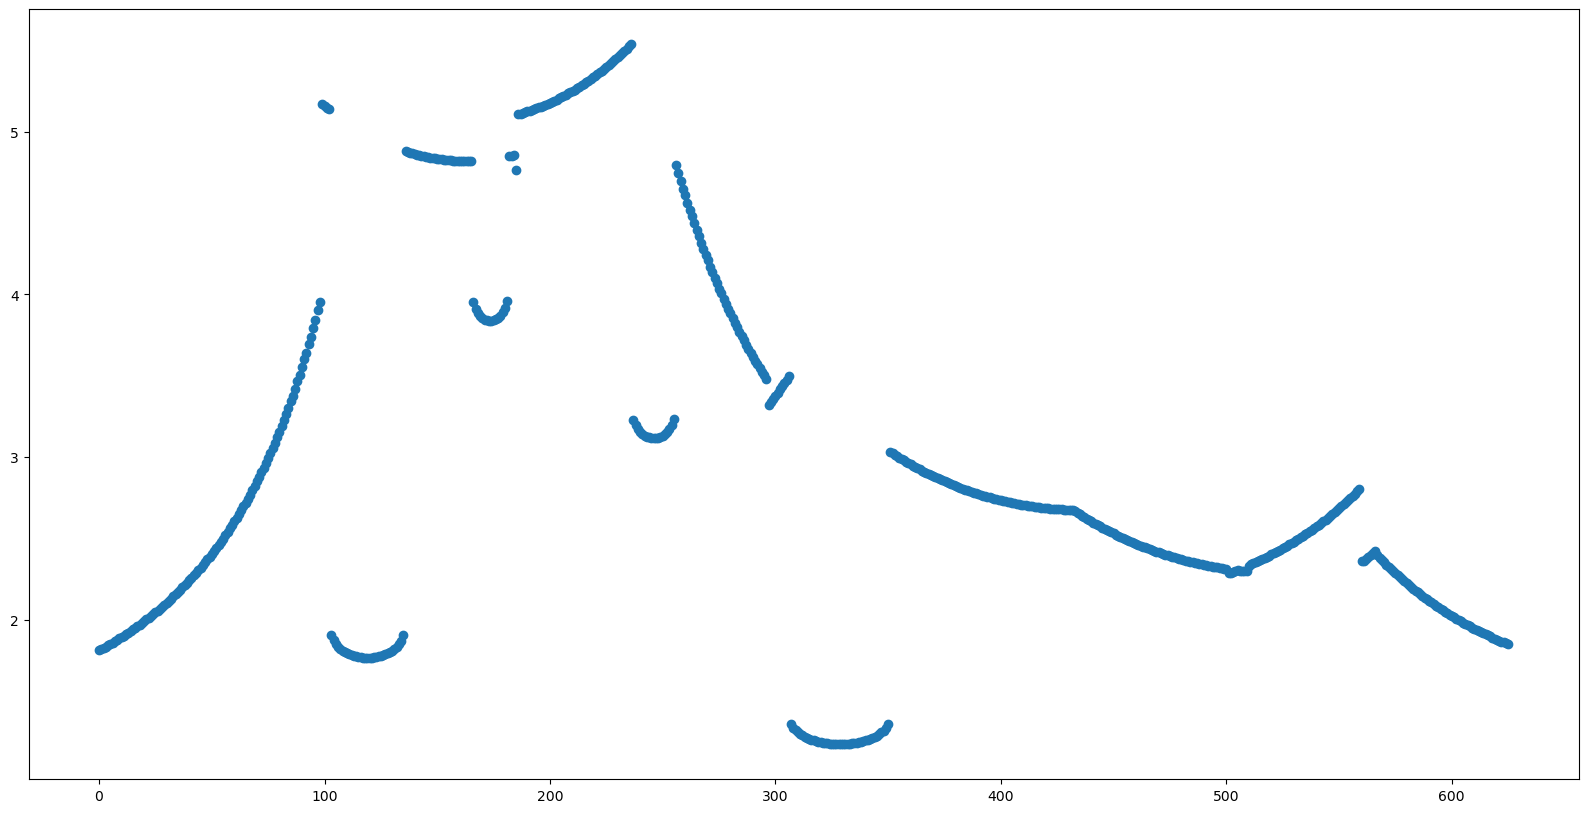

In [1]:
import matplotlib.pyplot as plt
# Inizializza una lista vuota per memorizzare tutti i dati
all_data = []
# Apri il file in modalità lettura
with open('data.txt', 'r') as file:
    # Leggi tutte le righe del file
    lines = file.readlines()

    # Itera attraverso le righe
    for line in lines:
        # Rimuovi il carattere di nuova riga
        line = line.strip()

        # Dividi la riga in una lista di valori
        data = line.split(',')
        # Aggiungi la lista di valori alla lista di tutti i dati
        for i in range(len(data)):
            all_data.append(data[i])

#chek if the data is a string o a number
for i in range(len(all_data)):
    try:
        all_data[i] = float(all_data[i])
    except ValueError:
        print("error in line", i)
        print("invalid data:", all_data[i])
        # delete all_data[i] from the list

#delete the data with '' form all_data
all_data = [x for x in all_data if x != '']

dataCleand = all_data[20:-20]
plt.figure(figsize=(20, 10))
plt.scatter(range(len(dataCleand)),dataCleand)
plt.show()
        

In [2]:
#smooth data
def smooth_data(dataS, window_size):
    # Crea una lista vuota per memorizzare i dati
    smoothed_data = []
    # Itera attraverso i dati
    for i in range(len(dataS)):
        # Se il dato è troppo vicino al bordo, non è possibile calcolare la media
        if i < window_size or i >= len(dataS) - window_size:
            smoothed_data.append(dataS[i])
        else:
            # Calcola la media dei dati nel range
            total = 0
            for j in range(i - window_size, i + window_size + 1):
                total += dataS[j]
            smoothed_data.append(total / (window_size * 2 + 1)) 
    return smoothed_data

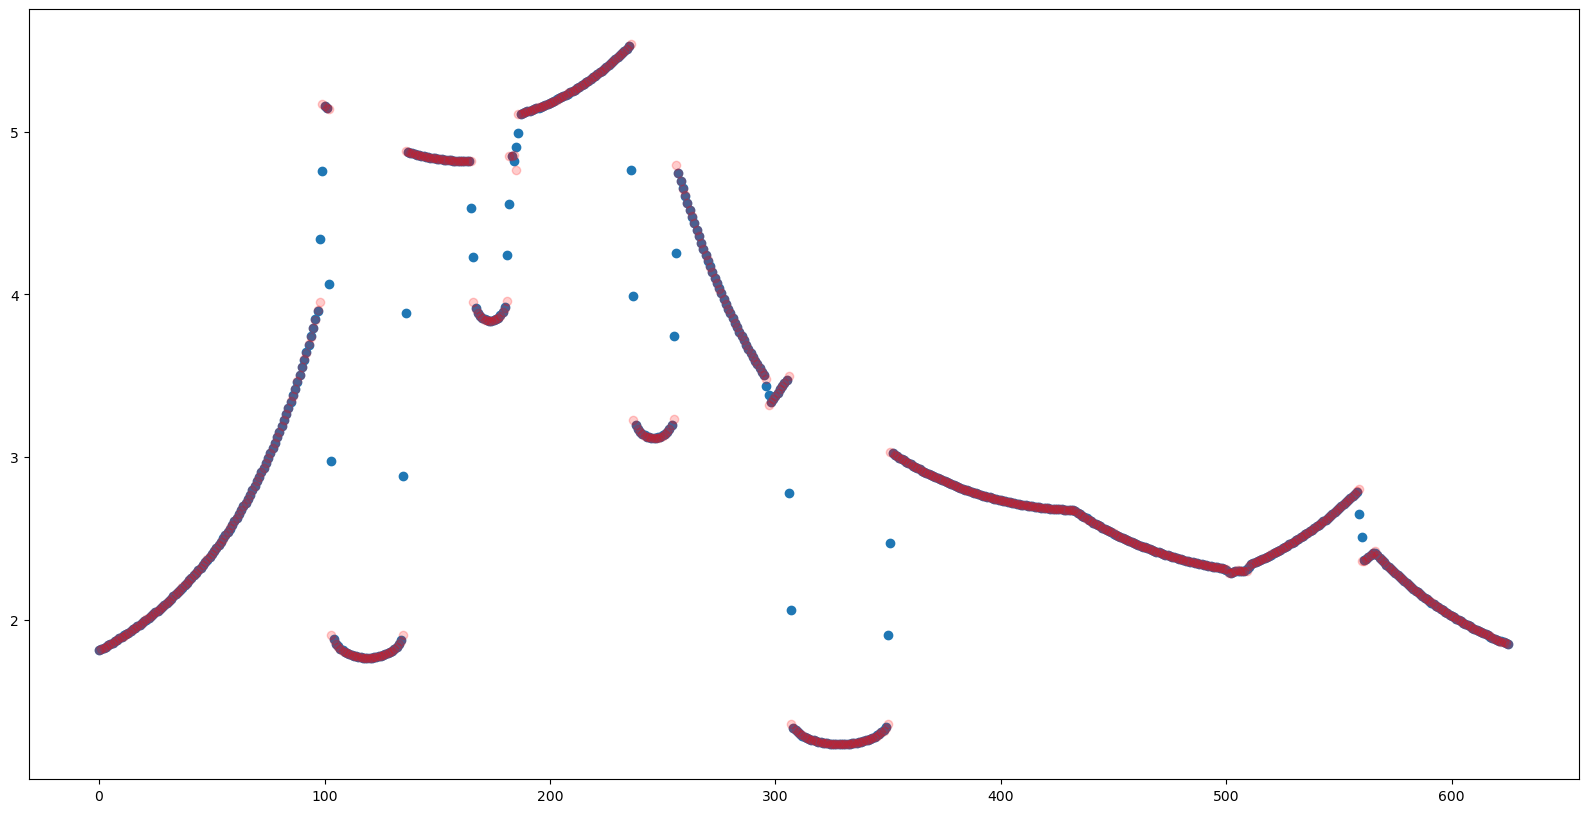

In [3]:
smoothed_data = smooth_data(dataCleand, 1)
plt.figure(figsize=(20, 10))
plt.scatter(range(len(smoothed_data)),smoothed_data)
plt.scatter(range(len(dataCleand)),dataCleand, alpha=0.2, c='r')
plt.show()

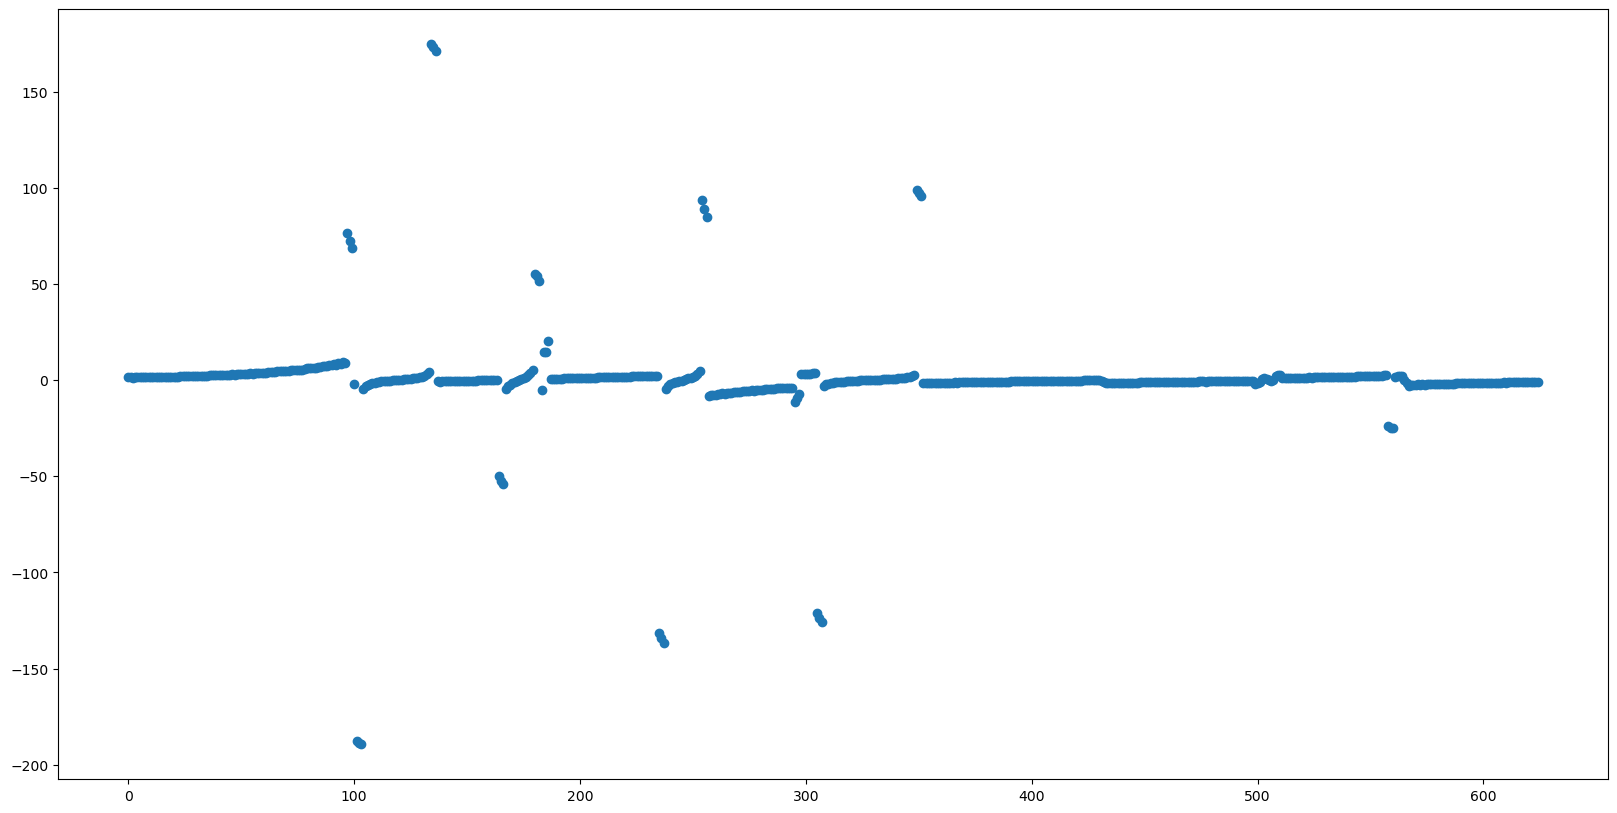

In [4]:
def diff_fin(fxh,fx,h):
    return (fxh-fx)/h

#costatnt 
h = 0.005774

derPrima = []
for i in range(len(smoothed_data)-1):
    derPrima.append(diff_fin(smoothed_data[i+1],smoothed_data[i],h))

plt.figure(figsize=(20, 10))
plt.scatter(range(len(derPrima)),derPrima)
        

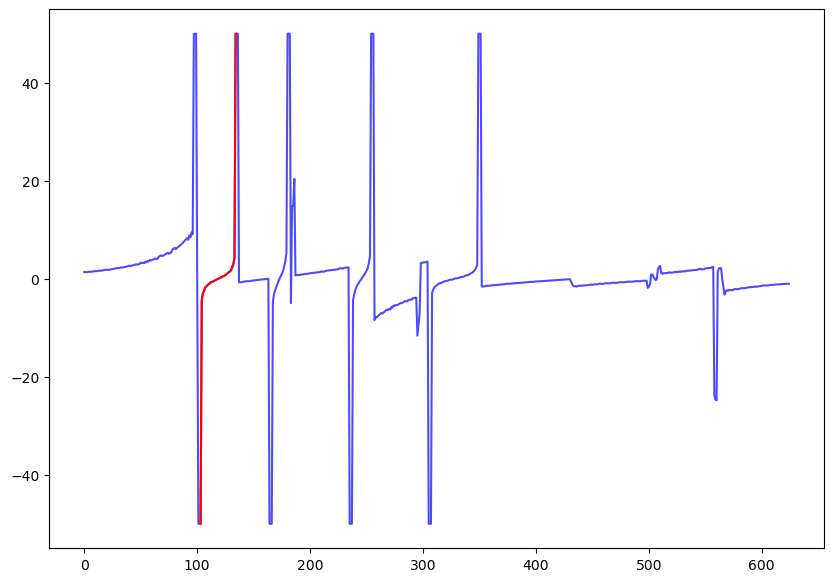

In [13]:
#abbassa i valri maggiori di 10 a 10 e quelli minori di -10 a -10 in modo da avere una linea più pulita
derPrimaCleaned = derPrima
for i in range(len(derPrimaCleaned)):
    if derPrimaCleaned[i] > 50:
        derPrimaCleaned[i] = 50
    elif derPrimaCleaned[i] < -50:
        derPrimaCleaned[i] = -50
plt.figure(figsize=(10,7))
#plot the derPrimaCleaned make it red for the 103 to the 135 data
plt.plot(range(len(derPrimaCleaned)),derPrimaCleaned, alpha=0.7, c='b')
plt.plot(range(103,135),derPrimaCleaned[103:135], alpha=1, c='r')
plt.plot(range(103,135),derPrimaCleaned[166:181], alpha=1, c='r')
plt.plot(range(103,135),derPrimaCleaned[237:255], alpha=1, c='r')
plt.plot(range(103,135),derPrimaCleaned[307:350], alpha=1, c='r')
plt.show()





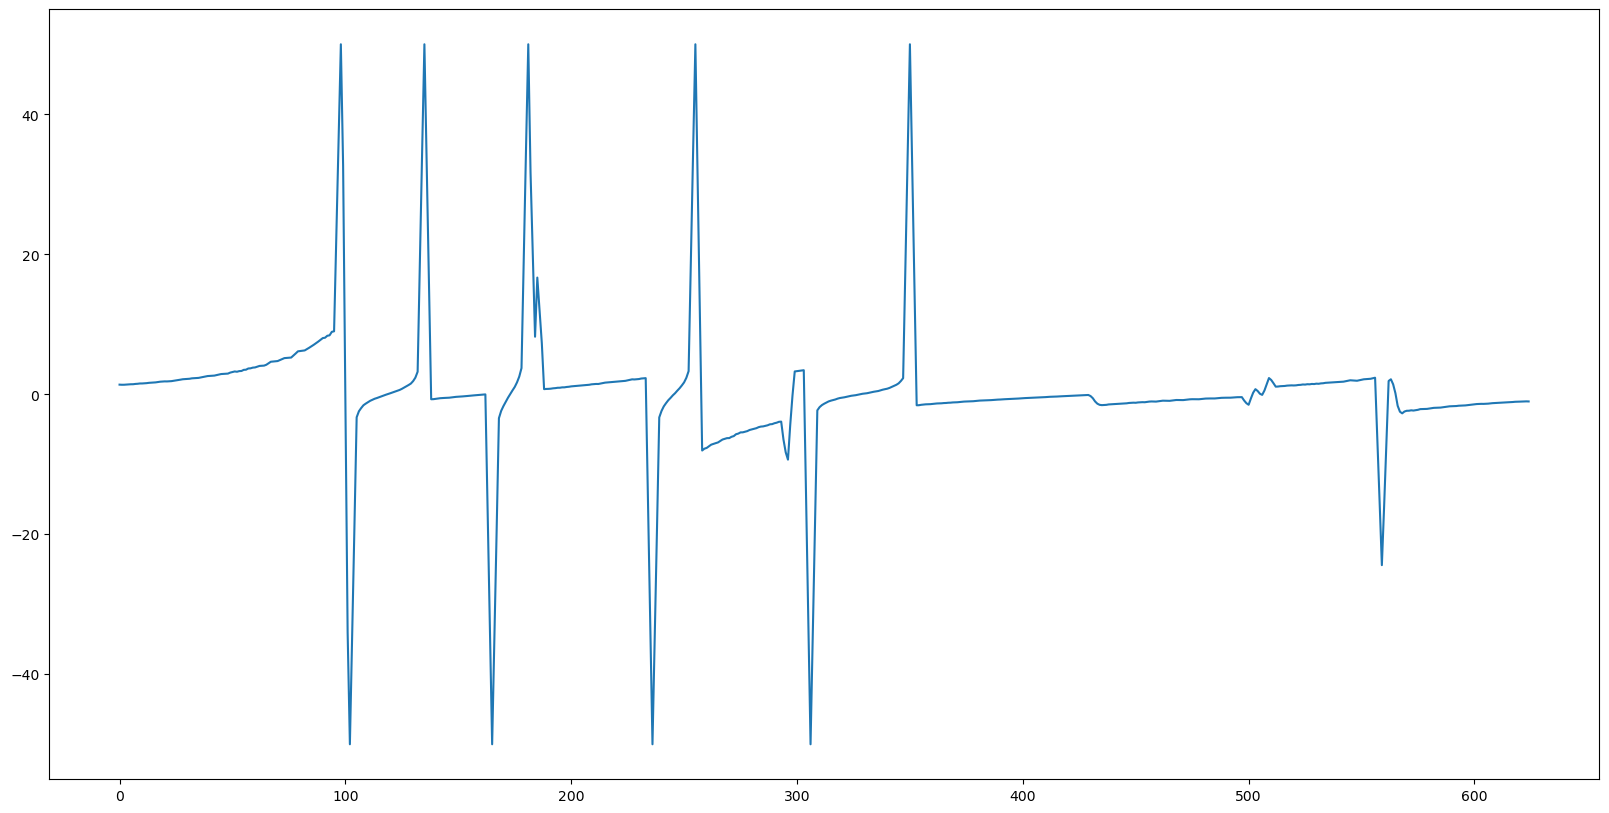

In [6]:
smooth_data_der = smooth_data(derPrimaCleaned, 1)
plt.figure(figsize=(20,10))
plt.plot(smooth_data_der)

plt.show()




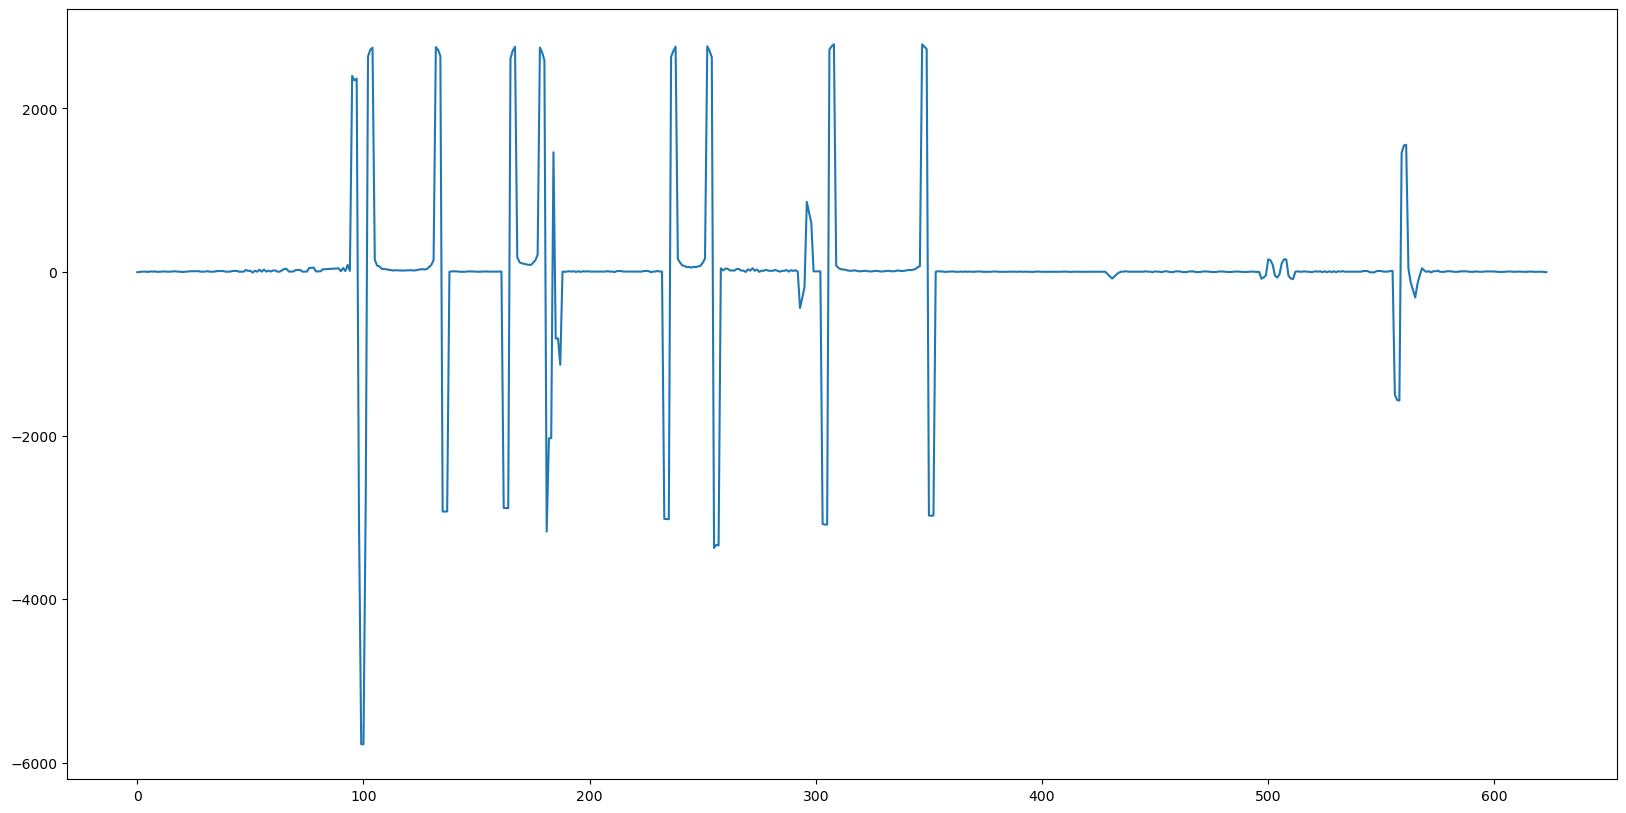

In [7]:
derSeconda = []
for i in range(len(smooth_data_der)-1):
    derSeconda.append(diff_fin(smooth_data_der[i+1],smooth_data_der[i],h))

plt.figure(figsize=(20,10))
plt.plot(derSeconda)

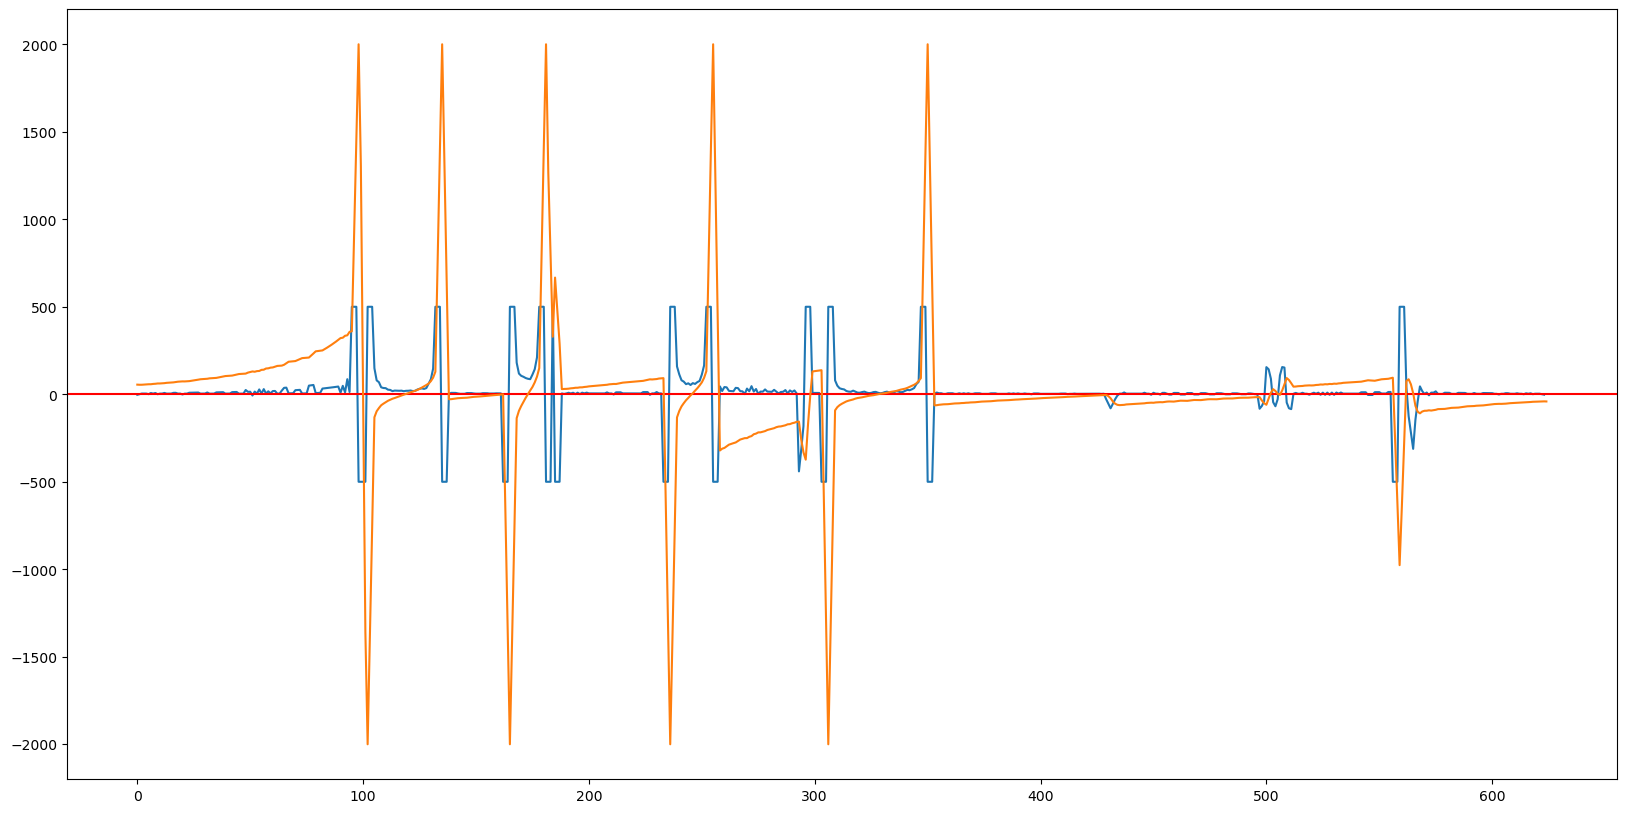

In [8]:
#abbassa i valri maggiori di 500 a 500 e quelli minori di -500 a -500 in modo da avere una linea più pulita
derSecondaCleaned = derSeconda
for i in range(len(derSecondaCleaned)):
    if derSecondaCleaned[i] > 500:
        derSecondaCleaned[i] = 500
    elif derSecondaCleaned[i] < -500:
        derSecondaCleaned[i] = -500

plt.figure(figsize=(20,10))
plt.plot(derSecondaCleaned)
#plot the 0 line
plt.axhline(y=0, color='r', linestyle='-')
#plot the firt derivate mulitplied by 10
firstDerivate = [x*40 for x in smooth_data_der]
plt.plot(firstDerivate)
plt.show()



In [9]:
#find where first derivate is 0
zeroFirstDerivate = []
for i in range(len(firstDerivate)-1):
    if firstDerivate[i] < 0 and firstDerivate[i+1] > 0:
        zeroFirstDerivate.append(i)
    elif firstDerivate[i] > 0 and firstDerivate[i+1] < 0:
        zeroFirstDerivate.append(i)
print(zeroFirstDerivate)

[99, 118, 137, 172, 233, 245, 257, 298, 303, 327, 352, 501, 505, 506, 556, 561, 565]


In [10]:
def window_mean(data, windowINPUT, index):
    window = int(windowINPUT/2)
    total = 0
    for i in range(index-window, index+window+1):
        total += data[i]
    return total/(window*2+1)

print(window_mean(derSecondaCleaned,2,zeroFirstDerivate[2]-2) )
#find the inflection point
inflectionPoint = []
for i in range(len(zeroFirstDerivate)):
    #if the second derivate positve before and afer the zero, add to the list
    if window_mean(derSecondaCleaned,2,zeroFirstDerivate[i]-2) > 0 and window_mean(derSecondaCleaned,2,zeroFirstDerivate[i]+2)  > 0:
        inflectionPoint.append(zeroFirstDerivate[i])

print(inflectionPoint)

-166.66666666666666
[118, 172, 245, 298, 327]
